# Bike Sharing Demand Prediction

### Table of Contents:
1. Business Problem.
2. Analyis Objectives.
3. Loading and Handling the dataset.
4. Exploratory Data Analysis.
5. Data preparation.
6. Building Linear Regression Model.
7. Masking prediction using the final model.
8. Model Evaluation.

## 1. Business Problem

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

To optimize their plan, the company want to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## 2. Analysis Objective:

Modelling the demand for bikes sharing demand with the available independent variables, then the company can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 3. Loading and Handling the dataset

### Read csv file

In [1]:
##import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('mode.chained_assignment', None)      
pd.set_option('display.max_colwidth', None)         
pd.set_option('display.max_columns', None)     

In [3]:
#Load the dataset
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


- The dataset provides a comprehensive depiction of the bike rental data pertaining to the operations of BoomBikes and some related factors, encompassing a total of 730 rows and 16 columns. 
- Notably, it is noteworthy that the dataset exhibits an absence of null values, rendering it complete and devoid of any missing data entries.
- Target variable is cnt (count of total rental bikes including both casual and registered).

### Handling outliers

In [7]:
font = {'family' : 'Helvetica',
        'weight' : 'normal',
        'size'   : 12
        }

plt.rc('font', **font)

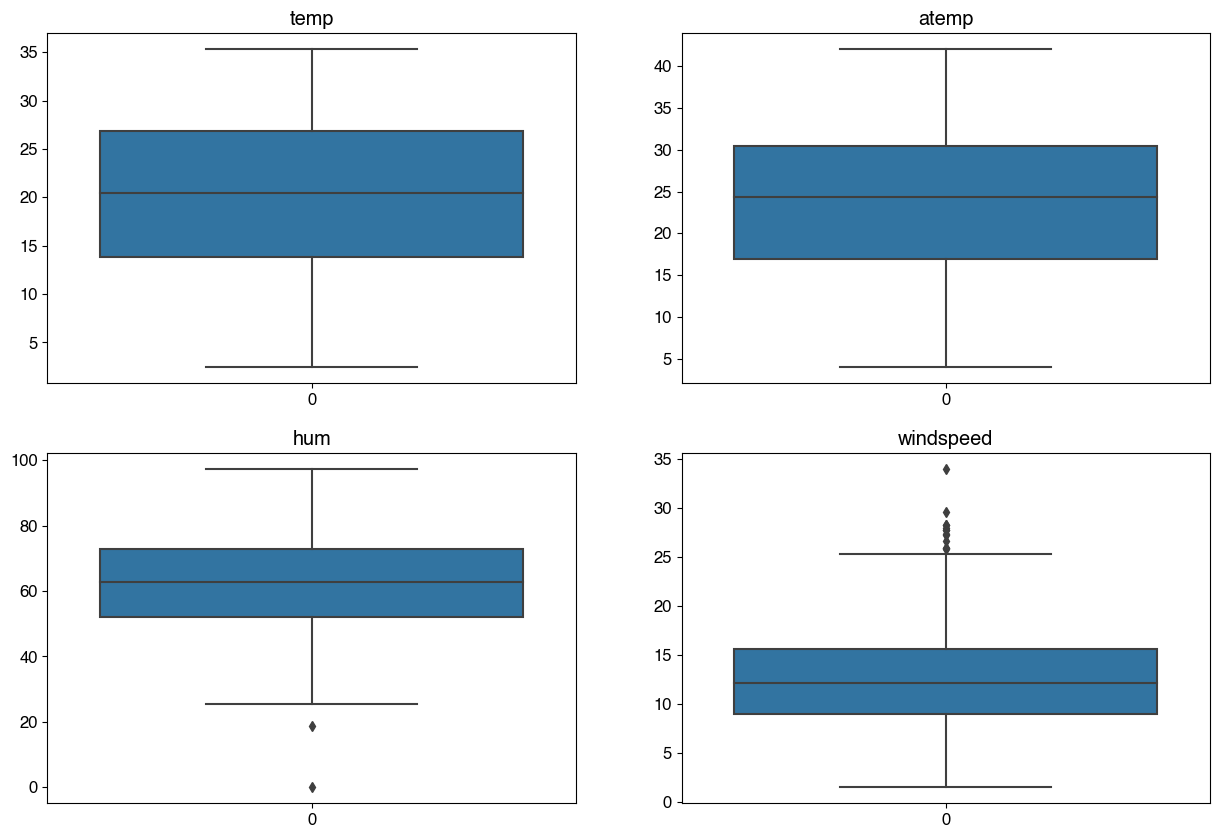

In [8]:
#check outliers
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.boxplot(bike['temp'], ax= axs[0,0])
axs[0,0].set_title('temp')
sns.boxplot(bike['atemp'], ax= axs[0,1])
axs[0,1].set_title('atemp')
sns.boxplot(bike['hum'], ax= axs[1,0])
axs[1,0].set_title('hum')
sns.boxplot(bike['windspeed'], ax= axs[1,1])
axs[1,1].set_title('windspeed')
plt.show()

'hum' and 'windspeed' contain outliers, but the outliers in both variables are natural outliers, and this is not caused by measurement errors or wrong data collection. Therefore, we don't need to remove them.

## 4. Exploratory Data Analysis

Based on the information provided, we can see generally that the demand for bike rental may be described as seasonal (season,weekdays, weekends, holidays, etc) or weather-related (temp, wind speed, etc.). We will determine the trends and patterns in the dataset if any.

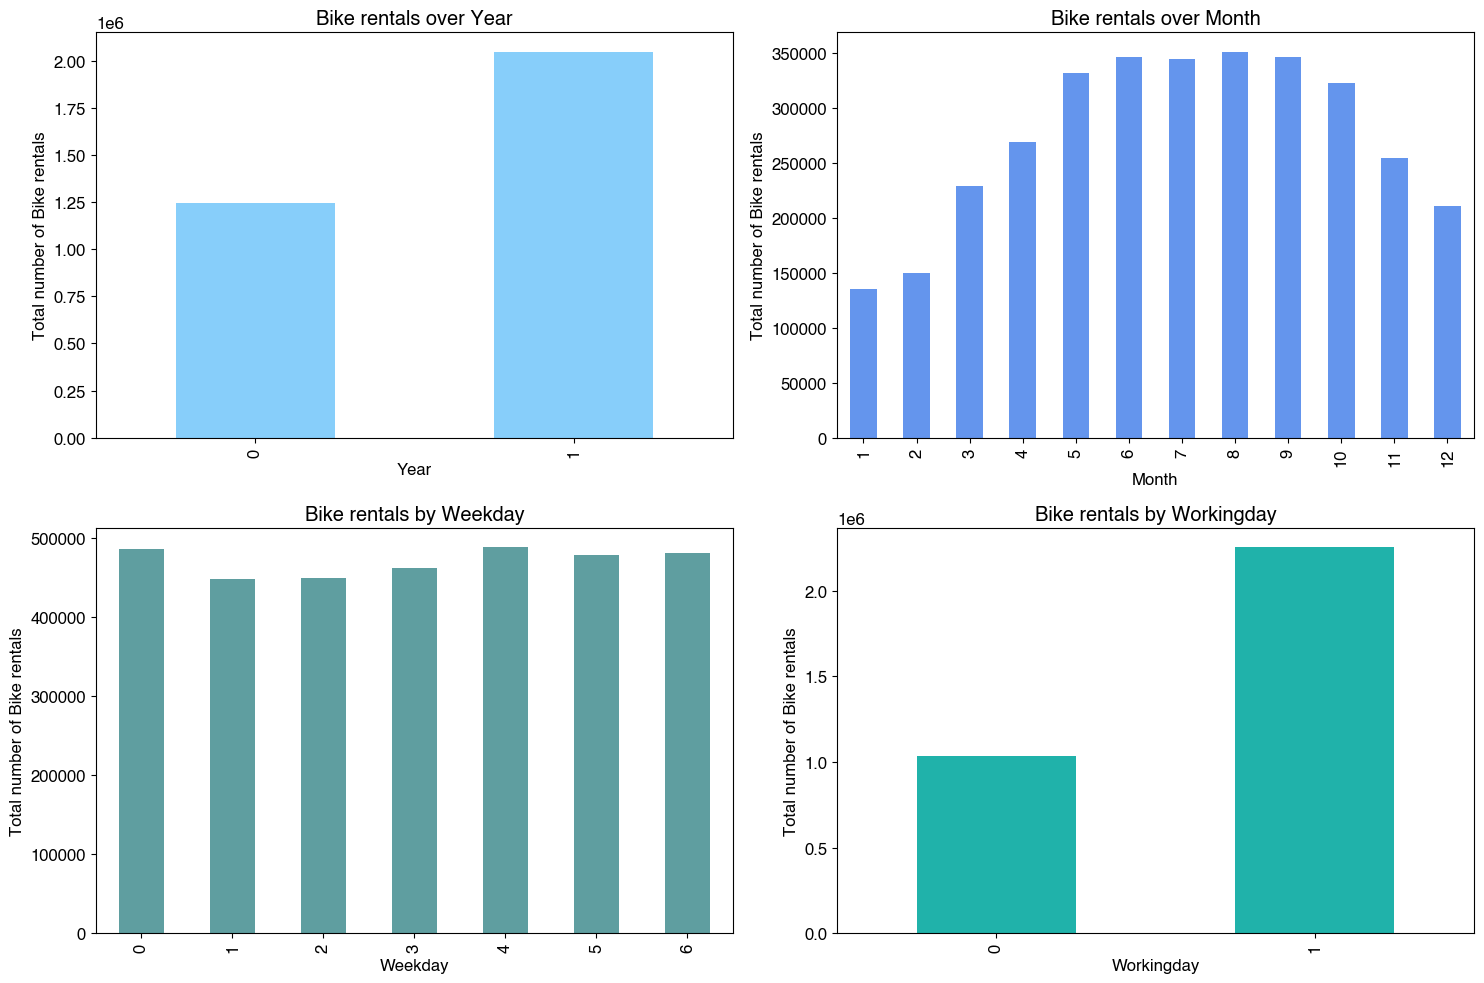

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

bike.groupby('yr').cnt.sum().plot.bar(ax=axs[0,0], color= ['lightskyblue'])
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Total number of Bike rentals')
axs[0,0].set_title('Bike rentals over Year')

bike.groupby(by='mnth').cnt.sum().plot.bar(ax=axs[0,1], color= ['cornflowerblue'])
axs[0,1].set_xlabel('Month')
axs[0,1].set_ylabel('Total number of Bike rentals')
axs[0,1].set_title('Bike rentals over Month')

bike.groupby('weekday').cnt.sum().plot.bar(ax=axs[1,0], color = ['cadetblue'])
axs[1,0].set_xlabel('Weekday')
axs[1,0].set_ylabel('Total number of Bike rentals')
axs[1,0].set_title('Bike rentals by Weekday')

bike.groupby(by='workingday').cnt.sum().plot.bar(ax=axs[1,1], color= ['lightseagreen'])
axs[1,1].set_xlabel('Workingday')
axs[1,1].set_ylabel('Total number of Bike rentals')
axs[1,1].set_title('Bike rentals by Workingday')

plt.tight_layout()
plt.show()

The insights:
- The total number of rental bikes increased from 2018 to 2019.
- The numbers decline at the end of the year while growing in the middle of the year. There is a distinct difference between the months of the year.
- The difference between the days of the week is not significant. However, we can see that the number of bike rentals on weekends and holidays is much lower than on normal days.

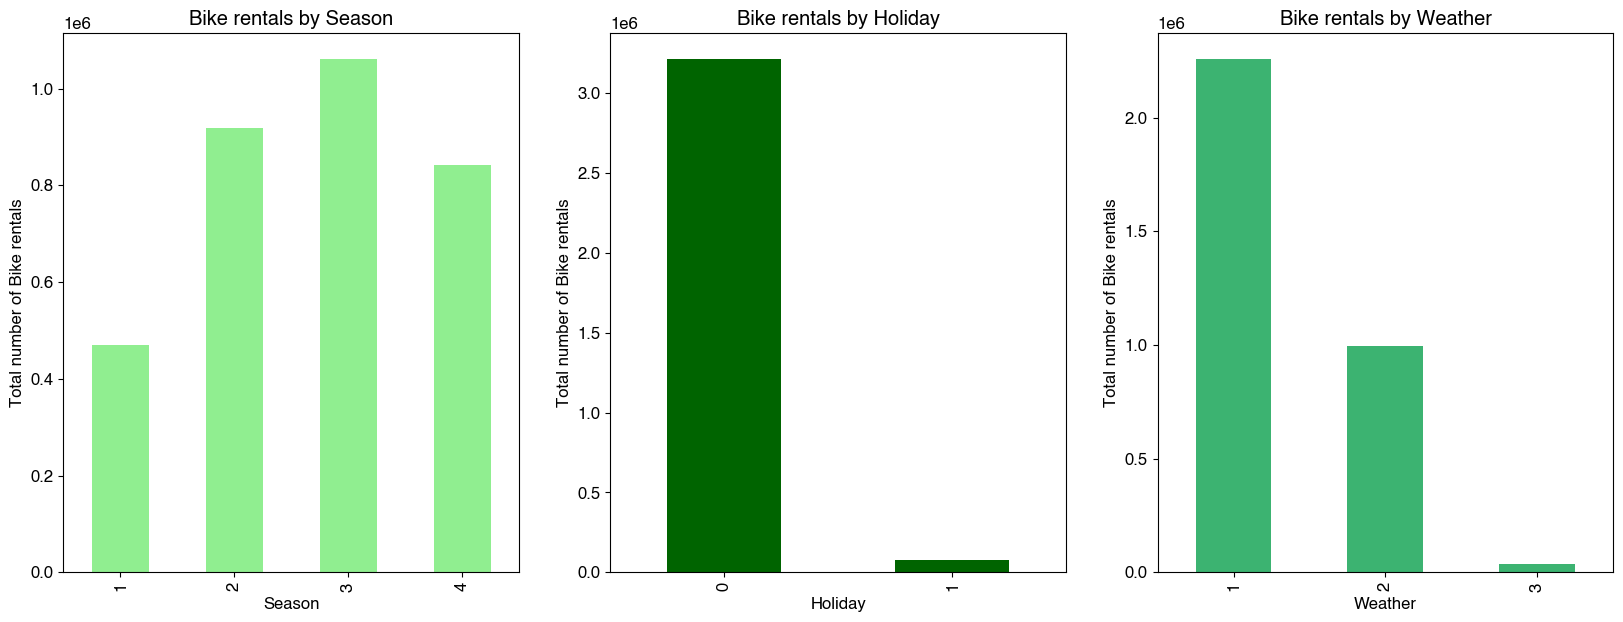

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))

bike.groupby('season').cnt.sum().plot.bar(ax=axs[0], color= ['lightgreen'])
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Total number of Bike rentals')
axs[0].set_title('Bike rentals by Season')

bike.groupby(by='holiday').cnt.sum().plot.bar(ax=axs[1], color= ['darkgreen'])
axs[1].set_xlabel('Holiday')
axs[1].set_ylabel('Total number of Bike rentals')
axs[1].set_title('Bike rentals by Holiday')

bike.groupby(by='weathersit').cnt.sum().plot.bar(ax=axs[2], color= ['mediumseagreen'])
axs[2].set_xlabel('Weather')
axs[2].set_ylabel('Total number of Bike rentals')
axs[2].set_title('Bike rentals by Weather')

plt.show()


The insights:
- Fall is the peak season for bike rentals, followed by Summer. Spring is the lowest season.
- The majority of customers avoid renting bikes during holidays.
- Customers often rent bikes on clear, few clouds, partly cloudy, partly cloudy days. It explains the reality since riding a bicycle in bad weather is really challenging for individuals.

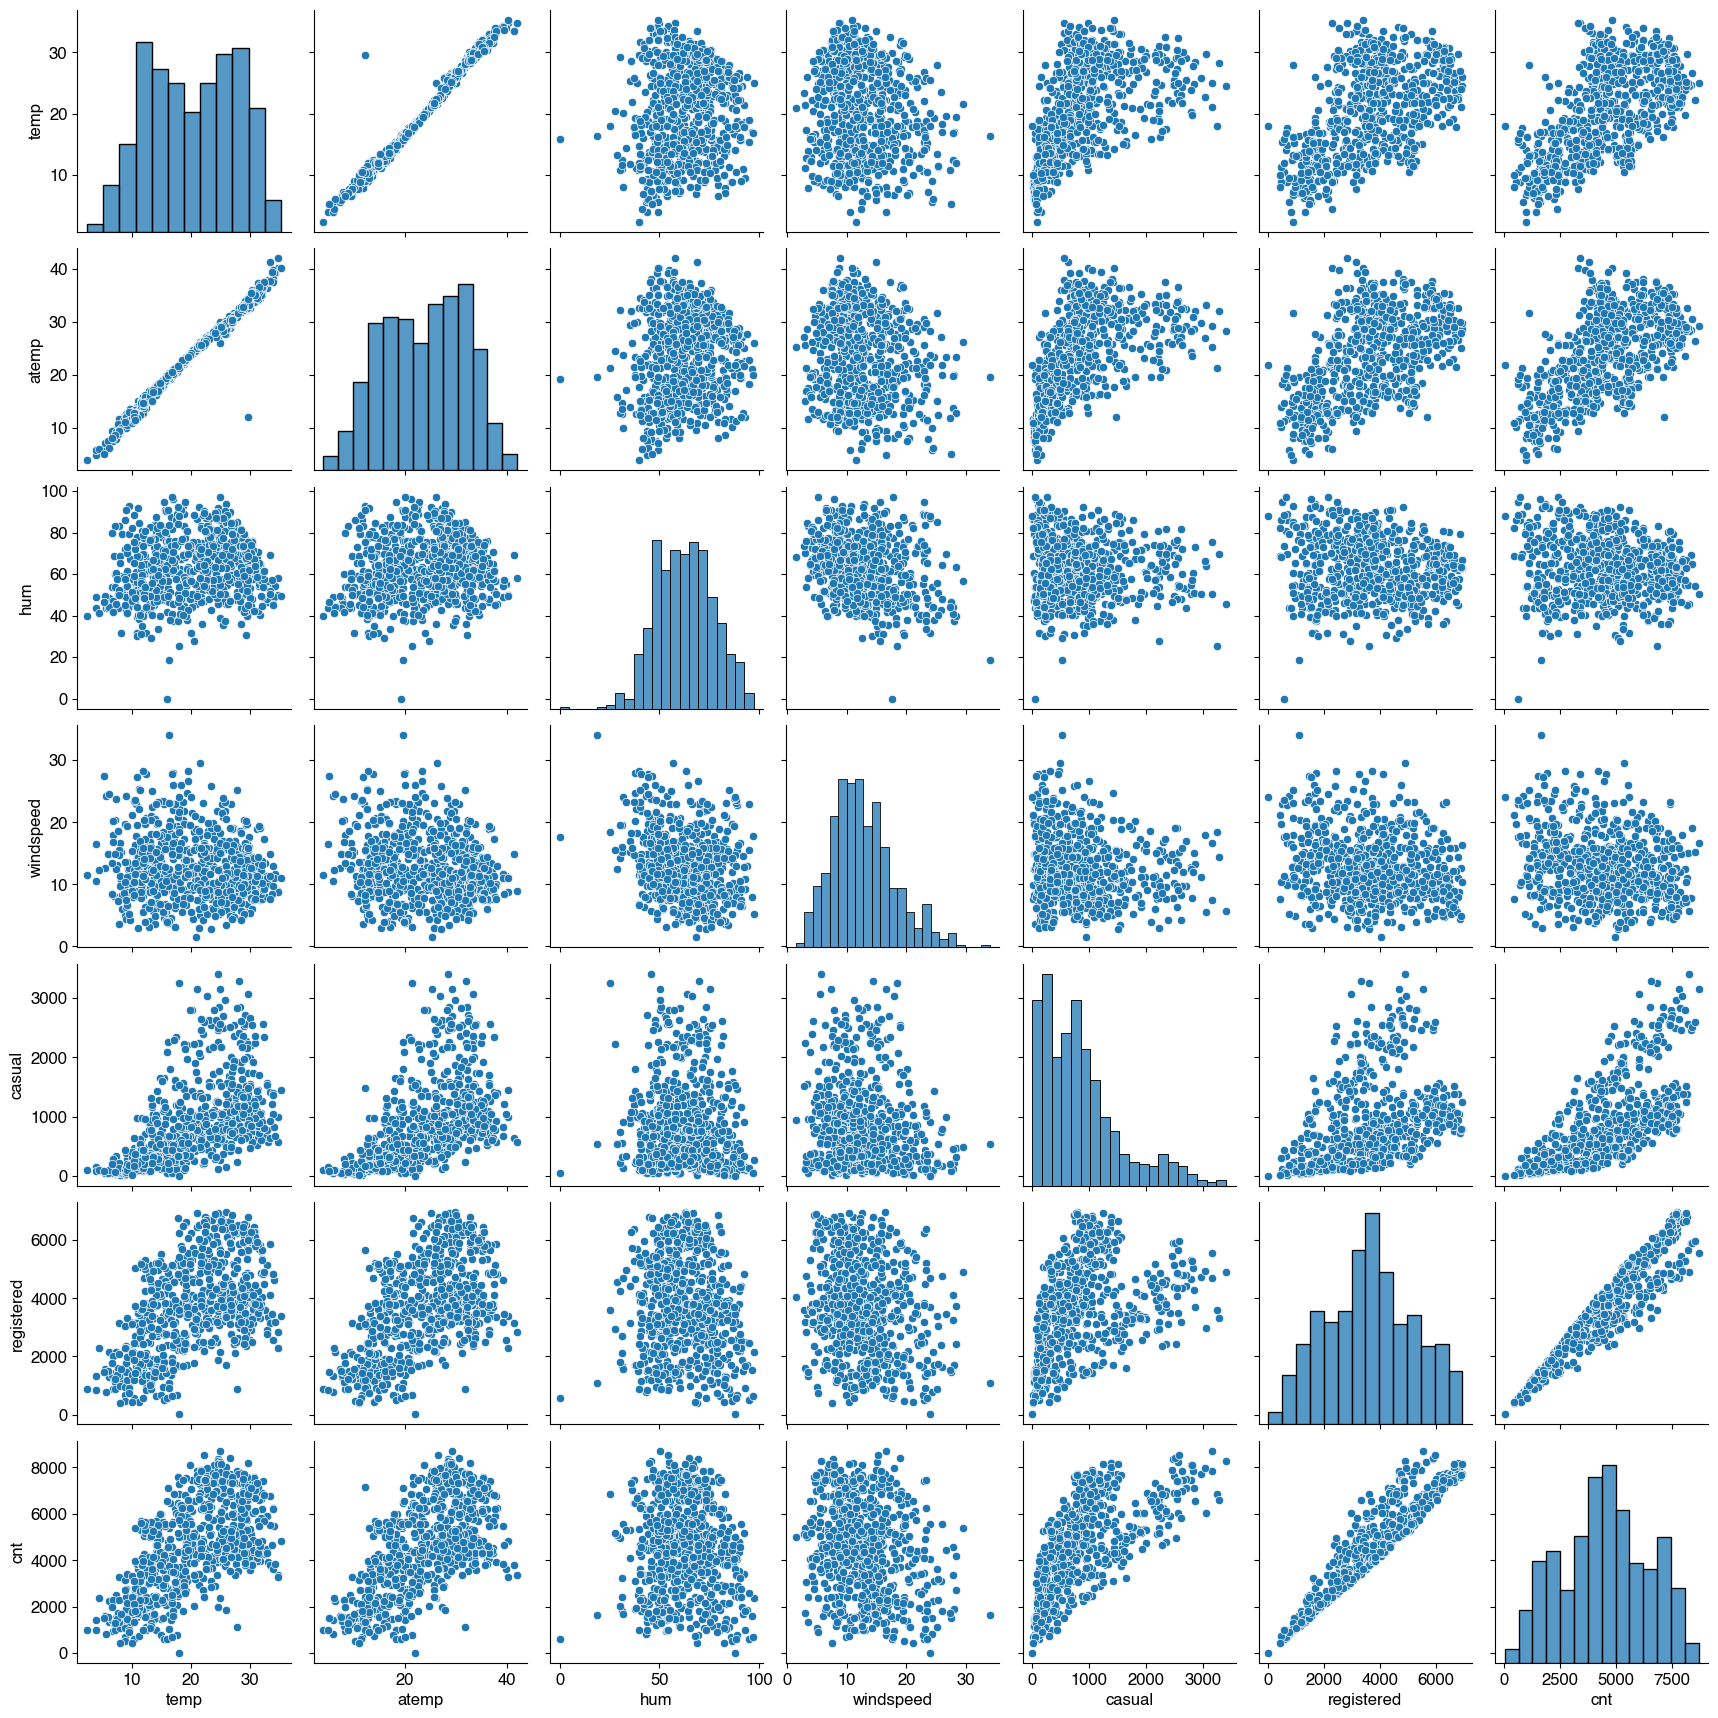

In [11]:
#numerical variables
num_var = ['temp','atemp','hum','windspeed','casual','registered','cnt']

sns.pairplot( bike[num_var])
plt.show()

Following the figures, we can observe that several variables—such as atemp vs. temp and registered vs. cnt.—have high correlations with one another.
Additionally, the variables "atemp" and "temp" have the highest correlations with the target variable.

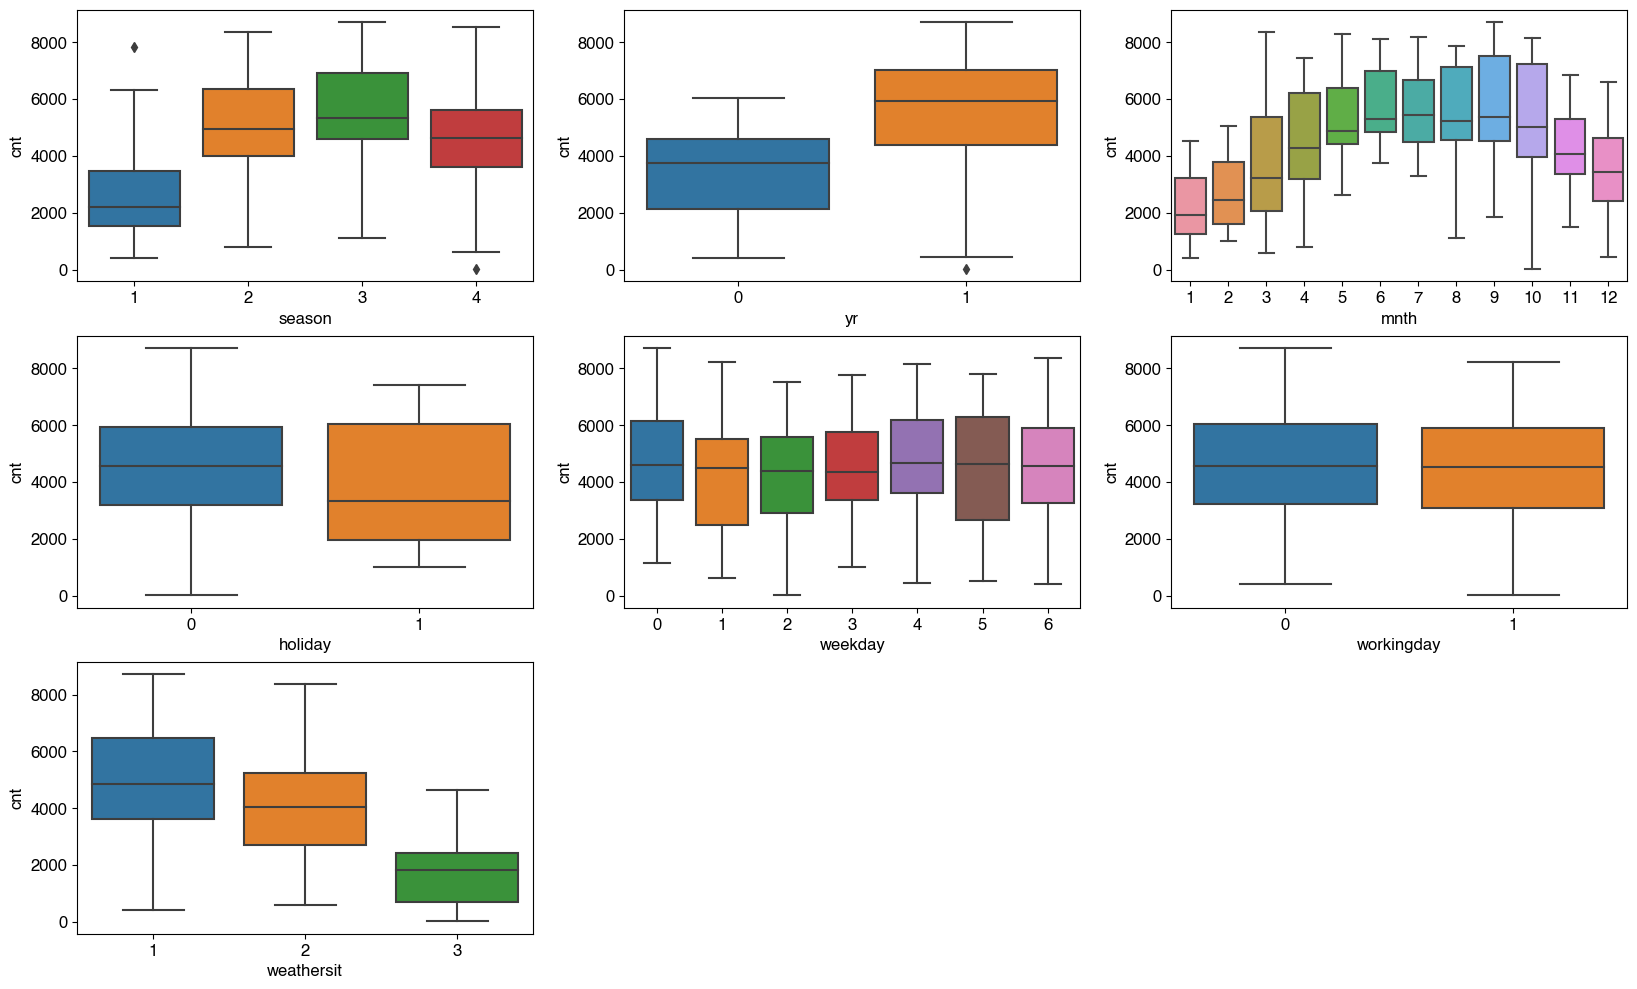

In [12]:
#categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.show()

- Season: It is obvious that fewer people rent bikes in the spring and winter than in the summer and fall. Additionally, spring is clearly the lowest season compared to other seasons. As a result of this, the effects of the seasons can be seen in the overall number of rental bikes.
- Year: In 2019, more bikes were rented overall than in 2018. It suggested that demand for bike sharing was rising. We can hypothesize that demand for bike rentals will increase annually in the future.
- Month: Through the months of the year, there is a pattern of rising and falling bicycle rental numbers. From January to April, the overall number of rental bikes rose; from May to September, it peaked; and from October to December, it decreased. 
- Weather: Nobody rented bikes in the bad weather of heavy rain, ice pellets, thunder, mist, snow, and fog, but in the good weather of light rain, a few clouds, mist, or clear weather, the total rental bikes increased accordingly.
- Holiday:  Fewer bicycle rentals occurred during holiday than usual.
- Weekday, working day: These factors have little to no effect on the total number of bike rentals.


## 5. Data preparation

We will start by eliminating the unnecessary variables:
- 'casual' and 'registered': they are components of target variable.
- 'instant': an index column.
- 'dteday': as we have 'yr' and 'mnth' variable, so we can drop it.
- 'atemp' or 'temp': we just keep one because two variables have a very high correlation, and atemp is from human perspective.

In [13]:
bike.drop(columns= ['casual','registered','instant','dteday','temp'], inplace= True)

In [77]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


### Dummy variables

Convert categorical variables to dummy variables

In [15]:
season = pd.get_dummies(bike['season'], drop_first= True)

In [16]:
season.rename(columns= {2:'summer', 3:'fall',4:'winter'}, inplace= True)

In [17]:
weather = pd.get_dummies(bike['weathersit'], drop_first= True)

In [18]:
weather.rename(columns={2:'mist_cloudy', 3:'snow_rain'}, inplace= True)

In [19]:
weekday = pd.get_dummies(bike['weekday'], drop_first= True)

In [20]:
weekday.rename(columns= {1:'Mon', 2: 'Tue', 3:'Wed',4:'Thu',5:'Fri',6:'Sat'}, inplace= True)

In [21]:
month = pd.get_dummies(bike['mnth'], drop_first= True)

In [22]:
month.rename(columns= {2:'Feb', 3: 'Mar', 4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}, inplace= True)

In [23]:
bike_1 = pd.concat([bike,season,weather,weekday,month], axis= 1)

In [24]:
bike_1.drop(columns= ['season','weathersit','weekday','mnth'], inplace= True)

In [25]:
bike_1.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,snow_rain,Mon,Tue,Wed,Thu,Fri,Sat,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   atemp        730 non-null    float64
 4   hum          730 non-null    float64
 5   windspeed    730 non-null    float64
 6   cnt          730 non-null    int64  
 7   summer       730 non-null    uint8  
 8   fall         730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  mist_cloudy  730 non-null    uint8  
 11  snow_rain    730 non-null    uint8  
 12  Mon          730 non-null    uint8  
 13  Tue          730 non-null    uint8  
 14  Wed          730 non-null    uint8  
 15  Thu          730 non-null    uint8  
 16  Fri          730 non-null    uint8  
 17  Sat          730 non-null    uint8  
 18  Feb          730 non-null    uint8  
 19  Mar     

We finally have an accurate dataset after preparation

## 6. Building Linear Regression Model

### Split the dataset

In [27]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scalling the numeric variables

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [29]:
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,snow_rain,Mon,Tue,Wed,Thu,Fri,Sat,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


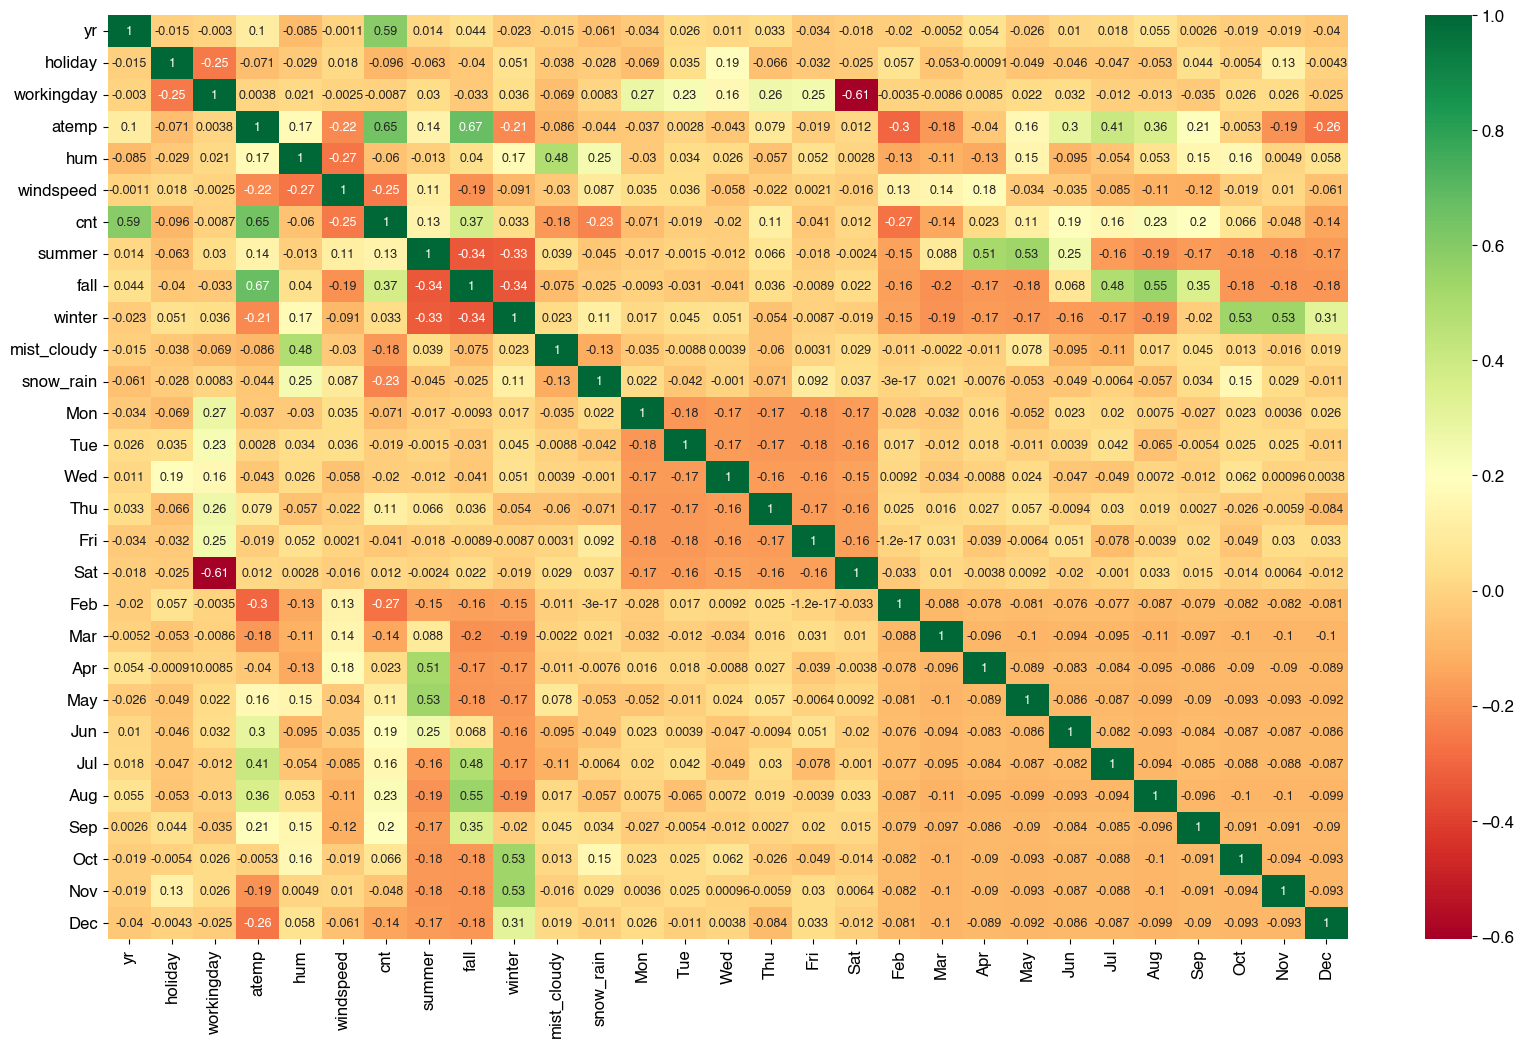

In [30]:
plt.figure(figsize=(20, 12))
sns.heatmap(df_train.corr(),annot= True, cmap= 'RdYlGn', annot_kws={"fontsize": 9})
plt.show()

As seen in the heatmap, 'atemp' has the highest correlation with the target variable 'cnt', followed by 'yr'

### Build the Linear Model

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

As we have many variables in the training dataset, we first use RFE to remove most of the insignificant variables.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)  # running RFE
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('mist_cloudy', True, 1),
 ('snow_rain', True, 1),
 ('Mon', False, 9),
 ('Tue', False, 10),
 ('Wed', False, 8),
 ('Thu', False, 6),
 ('Fri', False, 7),
 ('Sat', False, 14),
 ('Feb', False, 11),
 ('Mar', True, 1),
 ('Apr', False, 3),
 ('May', True, 1),
 ('Jun', False, 2),
 ('Jul', False, 4),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 12),
 ('Dec', False, 13)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'mist_cloudy', 'snow_rain', 'Mar', 'May', 'Aug', 'Sep',
       'Oct'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Feb', 'Apr',
       'Jun', 'Jul', 'Nov', 'Dec'],
      dtype='object')

In [37]:
X_train_rfe = X_train[col]

In [38]:
X_train_rfe.head()

,yr,holiday,atemp,hum,windspeed,summer,fall,winter,mist_cloudy,snow_rain,Mar,May,Aug,Sep,Oct
653,1,0,0.501133,0.575354,0.300794,0,0,1,0,0,0,0,0,0,1
576,1,0,0.766351,0.725633,0.264686,0,1,0,0,0,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,0,0,0,1,0,1,0,0,0,0
728,1,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,1,0,0,1,0,0,0,0,0,0


### Using statsmodels to build the model

In [39]:
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          7.90e-187
Time:                        09:50:29   Log-Likelihood:                 509.05
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     494   BIC:                            -918.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2376      0.028      8.583      

In [41]:
#let check all columns of X_train_rfe again
X_train_rfe.columns 

Index(['const', 'yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'mist_cloudy', 'snow_rain', 'Mar', 'May', 'Aug', 'Sep',
       'Oct'],
      dtype='object')

As we see 'const' as a column in X_train_rfe, so we have to drop it before calculating VIF

In [42]:
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns #make sure the "const' value is excluded
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,23.16
3,hum,15.90
6,fall,8.23
4,windspeed,3.75
5,summer,3.69
7,winter,3.14
8,mist_cloudy,2.15
0,yr,2.04
12,Aug,1.85
11,May,1.68


'May' has high p-value (0.05) so we can drop this variable first

In [44]:
X = X_train_rfe.drop('May', 1,)

In [45]:
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.7
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          3.86e-187
Time:                        09:50:29   Log-Likelihood:                 507.06
No. Observations:                 510   AIC:                            -984.1
Df Residuals:                     495   BIC:                            -920.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2313      0.028      8.387      

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,22.68
3,hum,15.84
6,fall,8.01
4,windspeed,3.69
5,summer,3.44
7,winter,3.08
8,mist_cloudy,2.15
0,yr,2.03
11,Aug,1.85
13,Oct,1.64


'Mar' has high p-value (0.055), so we can drop it

In [48]:
X = X.drop('Mar', 1)

In [49]:
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [50]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.7
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          1.68e-187
Time:                        09:50:29   Log-Likelihood:                 505.16
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     496   BIC:                            -923.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2388      0.027      8.724      

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,22.51
3,hum,15.70
6,fall,7.66
4,windspeed,3.61
5,summer,3.37
7,winter,2.88
8,mist_cloudy,2.15
0,yr,2.03
10,Aug,1.85
12,Oct,1.63


'fall' has high p-value (0.027) and high VIF (7.66), so we can drop it

In [52]:
X = X.drop('fall', 1)

In [53]:
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          1.29e-187
Time:                        09:50:29   Log-Likelihood:                 502.64
No. Observations:                 510   AIC:                            -979.3
Df Residuals:                     497   BIC:                            -924.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2376      0.027      8.648      

In [55]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.80
2,atemp,9.95
4,windspeed,3.57
6,winter,2.25
7,mist_cloudy,2.14
0,yr,2.01
5,summer,1.84
11,Oct,1.61
9,Aug,1.56
10,Sep,1.33


'Oct' has high p-value (0.027), so we can drop it

In [56]:
X = X.drop('Oct', 1)

In [57]:
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.5
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          9.34e-188
Time:                        09:50:29   Log-Likelihood:                 500.14
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     498   BIC:                            -925.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2301      0.027      8.407      

In [59]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.71
2,atemp,9.72
4,windspeed,3.57
7,mist_cloudy,2.13
0,yr,2.01
5,summer,1.83
6,winter,1.74
9,Aug,1.55
10,Sep,1.30
8,snow_rain,1.16


'hum' has low p-value but high VIF (14.71), so we can drop it

In [60]:
X = X.drop('hum', 1)

In [61]:
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

In [62]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.0
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          3.10e-184
Time:                        09:50:29   Log-Likelihood:                 488.96
No. Observations:                 510   AIC:                            -955.9
Df Residuals:                     499   BIC:                            -909.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1280      0.017      7.462      

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.91
3,windspeed,3.05
0,yr,2.00
4,summer,1.82
8,Aug,1.55
5,winter,1.50
6,mist_cloudy,1.49
9,Sep,1.30
7,snow_rain,1.08
1,holiday,1.04


No variables are multicollinear since their VIFs are all smaller than 5, which means we are able to select lr_6 as the final model due to the low p-values for all variables as well.

In [64]:
lr_6.params

const          0.128027
yr             0.233374
holiday       -0.093901
atemp          0.536969
windspeed     -0.131954
summer         0.097789
winter         0.132357
mist_cloudy   -0.083591
snow_rain     -0.276982
Aug            0.067977
Sep            0.120748
dtype: float64

In [65]:
y_train_cnt = lr_6.predict(X_train_lm)

## 7. Residual Analysis of the Training Data

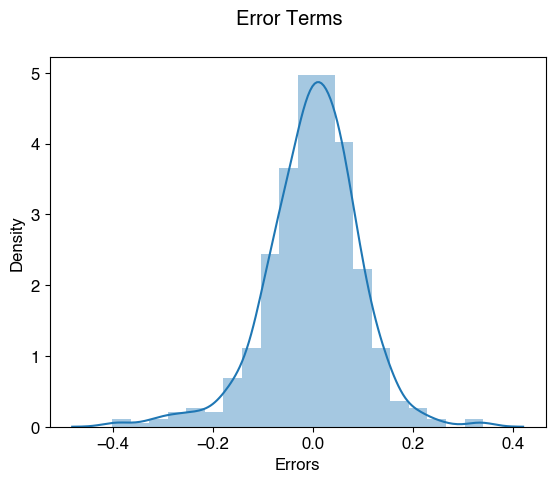

In [66]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms')               
plt.xlabel('Errors')
plt.show()                        

As the residual has a normal distribution, the model is accurately capturing the correlation between the independent variables and the dependent variable.

## 7.Masking prediction using the final model

In [67]:
#scalling the numercial variables
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [68]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,summer,fall,winter,mist_cloudy,snow_rain,Mon,Tue,Wed,Thu,Fri,Sat,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.319635,0.027397,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758
std,0.500722,0.188034,0.481313,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.467403,0.163612,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
X.columns #check the variable

Index(['yr', 'holiday', 'atemp', 'windspeed', 'summer', 'winter',
       'mist_cloudy', 'snow_rain', 'Aug', 'Sep'],
      dtype='object')

In [71]:
X_test_new = X_test[X.columns]

In [72]:
X_test_lr6 = sm.add_constant(X_test_new)

In [73]:
y_pred = lr_6.predict(X_test_lr6)

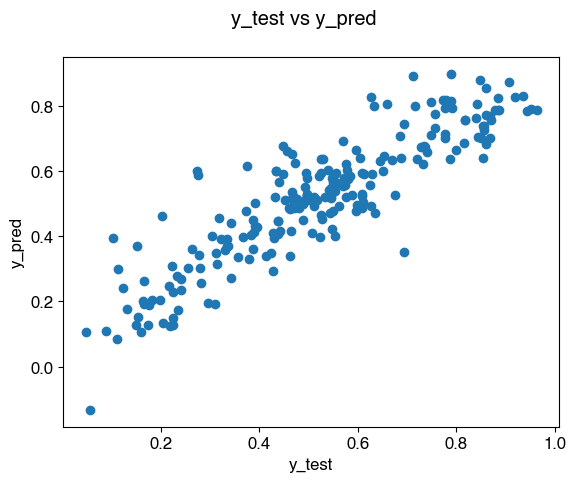

In [74]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred')              
plt.xlabel('y_test')                       
plt.ylabel('y_pred')
plt.show() 

## 8. Model Evaluation

In [75]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7937923992707867

In [76]:
lr_6.params

const          0.128027
yr             0.233374
holiday       -0.093901
atemp          0.536969
windspeed     -0.131954
summer         0.097789
winter         0.132357
mist_cloudy   -0.083591
snow_rain     -0.276982
Aug            0.067977
Sep            0.120748
dtype: float64

### Final conclusion:
- In the final model, we have:
+ R- squared: 0.829
+ Adjusted R-squared: 0.826
+ R2 score between y_test and y_pred: 0.7937

These numbers are significant, indicating the accuracy of the final model.

$ cnt = 0.128 + 0.233  \times  year - 0.094  \times  holiday + 0.537 \times atemp - 0.131 \times windspeed + 0.098 \times summer + 0.132 \times winter - 0.0836 \times mist_cloudy - 0.277 \times snow_rain + 0.068 \times Aug + 0.12 \times Sep $.

Based on the final model, the top 3 features significantly driving the demand for shared bikes are:

- ‘atemp’: has a positive correlation with the target variable, with coef = 0.537.
- ‘snow_rain’ (weather): has a negative correlation with the target variable, with coef  = - 0.277
- ‘yr’ (year): has a positive correlation with the target variable, with coef = 0.233.